# part 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [84]:
def craft_array_with_grid(d, height, width):
    arr = np.zeros((height,width))
    for i in range(0, height, d):
        for j in range(0, width, 1):
            arr[i][j] = 1
    return arr

def makeShiftedFFT(d):
    res = craft_array_with_grid(d,50,50)
    resF = np.fft.fft2(res)
    resFshift = np.fft.fftshift(resF)
    return resFshift

def showComplexArrayAsRealImage(img):
    plt.imshow(img.real)
    
def showComplexArrayAsImaginaryImage(img):
    plt.imshow(img.imag)
    

    

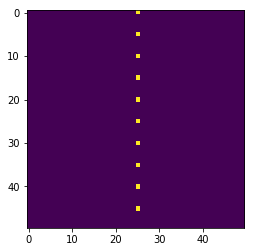

In [63]:
showComplexArrayAsRealImage(makeShiftedFFT(10))

# Part 2

In [64]:
from PIL import Image

In [85]:
def openToNparray(path):
    return np.asarray(Image.open(path))
def showComplexArrayModulusImage(img):
    plt.imshow(np.abs(img))
    
def showComplexArrayPhasisImage(img):
    plt.imshow(np.angle(img))

In [86]:
boat512 = openToNparray('images/boat512.gif')

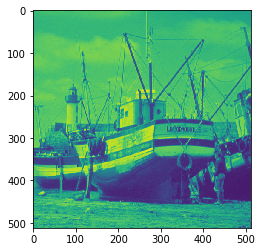

In [87]:
plt.imshow(boat512)

In [88]:
boat512F = np.fft.fft2(boat512)
boat512Fshift = np.fft.fftshift(boat512F)
boat512FshiftLog = np.log(boat512Fshift)

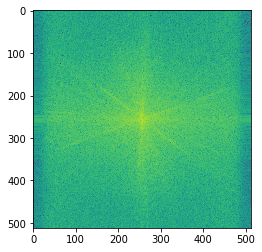

In [80]:
showComplexArrayModulusImage(boat512FshiftLog)

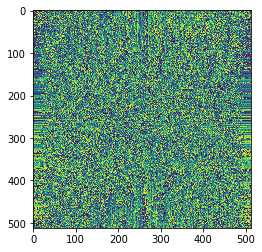

In [92]:
showComplexArrayPhasisImage(boat512Fshift)

In [99]:
backToTime = np.fft.ifft2(boat512Fshift)

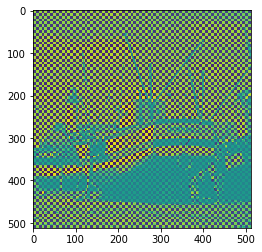

In [100]:
showComplexArrayAsImage(backToTime)

# part 3

In [117]:
barbara = openToNparray("images/barbara.png")
lena = openToNparray("images/lena.bmp")

barbaraF = np.fft.fft2(barbara)
lenaF = np.fft.fft2(lena)

In [118]:
barbaramodulus = np.abs(barbaraF)
barbaraphase = np.angle(barbaraF)

lenamodulus = np.abs(lenaF)
lenaphase = np.angle(lenaF)

In [122]:
modulusbarbara_phaselenaF = barbaramodulus * np.exp(1j * lenaphase)
modulusbarbara_phaselena = np.fft.ifft2(modulusbarbara_phaselenaF)

moduluslena_phasebarbaraF = lenamodulus * np.exp(1j * barbaraphase)
moduluslena_phasebarbara = np.fft.ifft2(moduluslena_phasebarbaraF)

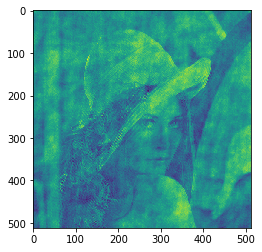

In [123]:
showComplexArrayAsImage(modulusbarbara_phaselena)

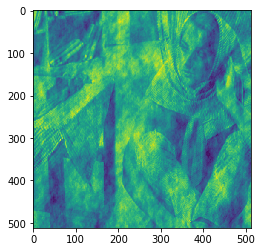

In [124]:
showComplexArrayAsImage(moduluslena_phasebarbara)